In [3]:
# import modules
import os # file 
import shutil
import cv2 # opencv for images
import random
import numpy as np
import pandas as pd
import torch
from ultralytics import YOLO #for obeject detection
import albumentations as A # for image augmentation
from albumentations.pytorch import ToTensorV2 # for image formating
import matplotlib.pyplot as plt

In [13]:
# Function to get class colors
def getColours(cls_num):
    base_colors = [(255, 0, 0), (0, 255, 0), (0, 0, 255)]
    color_index = cls_num % len(base_colors)
    increments = [(1, -2, 1), (-2, 1, -1), (1, -1, 2)]
    color = [base_colors[color_index][i] + increments[color_index][i] * 
    (cls_num // len(base_colors)) % 256 for i in range(3)]
    return tuple(color)


def drawPredictions(predictions, img): 
    for p in predictions:
        boxes = p.boxes
        for box in boxes:
            if box.conf[0] > 0.4:
                # get coordinates
                [x1, y1, x2, y2] = box.xyxy[0]
                # convert to int
                x1, y1, x2, y2 = int(x1), int(y1), int(x2), int(y2)
        
                cls = int(box.cls[0]) # get the class index
                # get the class name
                class_name = cls
        
                colour = getColours(cls)
        
                # draw prediction the rectangle
                cv2.rectangle(img, (x1, y1), (x2, y2), colour, 2)
        
                # put the class name and confidence on the image
                cv2.putText(img, f'{cls} {box.conf[0]:.2f}', (x1, y1), cv2.FONT_HERSHEY_SIMPLEX, 1, colour, 2)
                #cv2.putText(img, f'{classNames[int(box.cls[0])]} {box.conf[0]:.2f}', (x1, y1), cv2.FONT_HERSHEY_SIMPLEX, 1, colour, 2)
                

../datasets/images/train/-2544-_png_jpg.rf.13bfe27776b4d713faf93d42421ae13f.jpg

0: 640x640 5 persons, 1 tie, 59.0ms
Speed: 4.0ms preprocess, 59.0ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


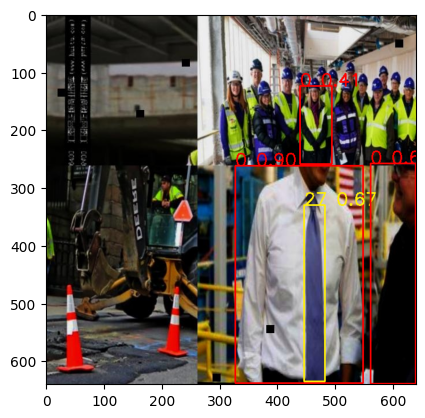

../datasets/images/train/-2544-_png_jpg.rf.185d1d1c0cb4027d76f7e31cd409022e.jpg

0: 640x640 3 persons, 1 tie, 1 fork, 64.8ms
Speed: 1.2ms preprocess, 64.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


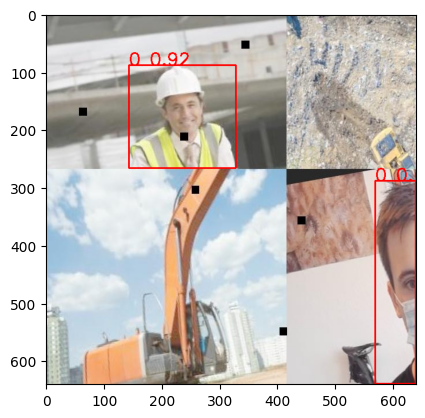

../datasets/images/train/-2544-_png_jpg.rf.1224ec786928243a0076833c5ddb34f4.jpg

0: 640x640 5 persons, 1 bus, 1 truck, 63.5ms
Speed: 1.4ms preprocess, 63.5ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)


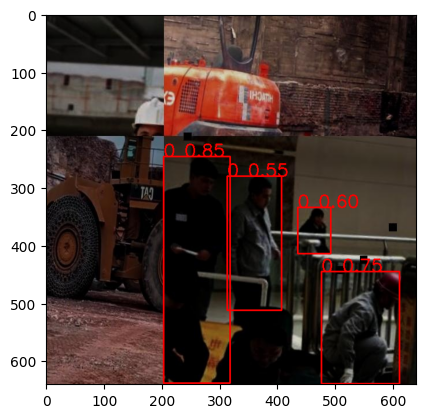

../datasets/images/train/616_jpg.rf.440e1d2885969b920d1115e4dd9c95d3.jpg

0: 640x640 6 persons, 1 horse, 1 sheep, 64.3ms
Speed: 2.1ms preprocess, 64.3ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)


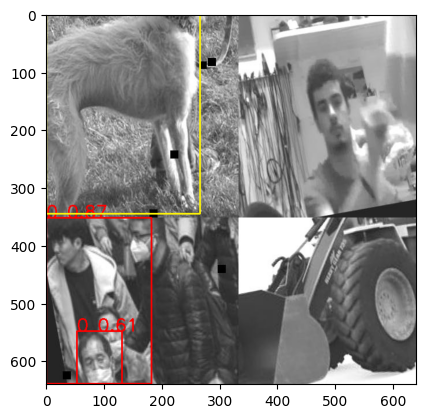

../datasets/images/train/2008_008600_jpg.rf.1e30fdd484a479256bd540cc92dc375b.jpg

0: 640x640 1 boat, 1 dog, 69.9ms
Speed: 1.6ms preprocess, 69.9ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)


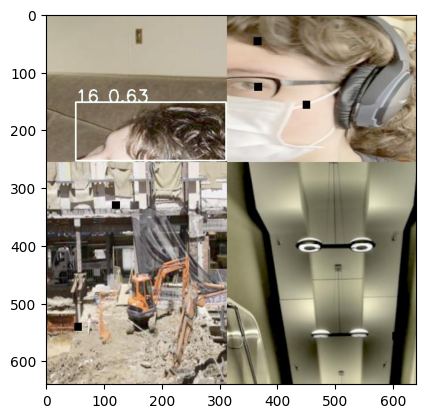

../datasets/images/train/2008_008618_jpg.rf.36f88cd9160d2a0be857a1f22210540b.jpg

0: 640x640 5 persons, 2 trains, 2 suitcases, 60.4ms
Speed: 2.3ms preprocess, 60.4ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


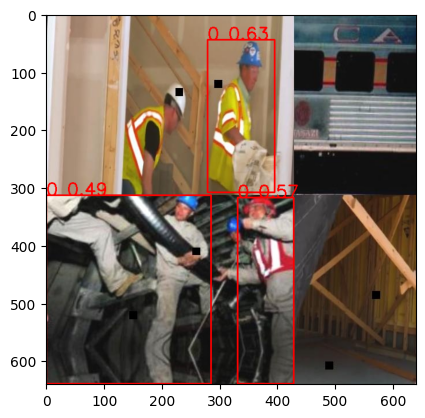

../datasets/images/train/2009_000280_jpg.rf.7c269bca3935b65ae9bf2d15593b9711.jpg

0: 640x640 1 person, 1 car, 1 boat, 67.2ms
Speed: 1.5ms preprocess, 67.2ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


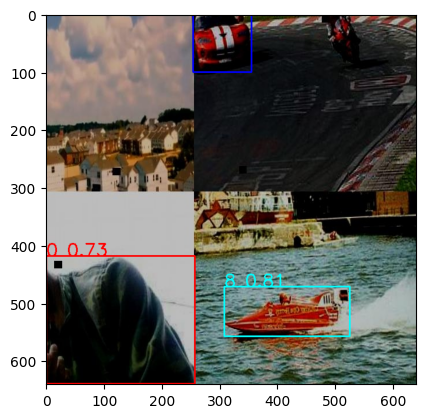

../datasets/images/train/amz_02354_png_jpg.rf.05804b93377b6f8d38b6e61553c4c129.jpg

0: 640x640 1 person, 1 train, 82.4ms
Speed: 3.0ms preprocess, 82.4ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


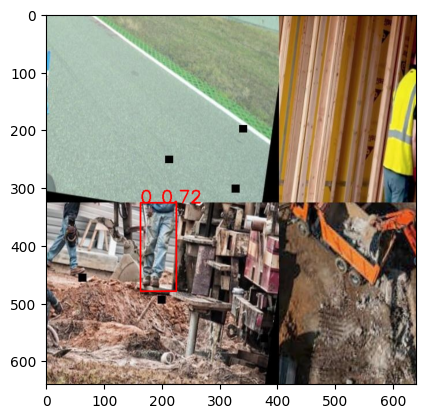

../datasets/images/train/autox6_mp4-80_jpg.rf.0cebdad4d9d8f205f998ceaad09ea576.jpg

0: 640x640 1 person, 1 truck, 70.5ms
Speed: 1.6ms preprocess, 70.5ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


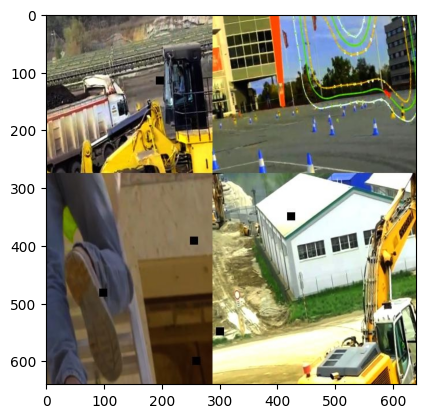

In [17]:
# load YOLOv8 pre-trained model
model = YOLO("../models/yolov8n.pt")

#Manually presenting annotations 


# train files
base_dir="../datasets/images/train/"

image_files=["-2544-_png_jpg.rf.13bfe27776b4d713faf93d42421ae13f.jpg", 
             "-2544-_png_jpg.rf.185d1d1c0cb4027d76f7e31cd409022e.jpg",
             "-2544-_png_jpg.rf.1224ec786928243a0076833c5ddb34f4.jpg",
            "616_jpg.rf.440e1d2885969b920d1115e4dd9c95d3.jpg",
            "2008_008600_jpg.rf.1e30fdd484a479256bd540cc92dc375b.jpg",
            "2008_008618_jpg.rf.36f88cd9160d2a0be857a1f22210540b.jpg",
            "2009_000280_jpg.rf.7c269bca3935b65ae9bf2d15593b9711.jpg",
            "amz_02354_png_jpg.rf.05804b93377b6f8d38b6e61553c4c129.jpg",
            "autox6_mp4-80_jpg.rf.0cebdad4d9d8f205f998ceaad09ea576.jpg"]

for path in image_files:
    # Open image file for reading and fix color grading
    file = base_dir + path
    print(file)
    img = cv2.imread(file) 
    
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    # perform inference using YOLOv8
    results = model(img)
    
    drawPredictions(results, img)
    plt.imshow(img)
    plt.show()
